In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Data file.csv')
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [3]:
#Checking the shape
df.shape

(209593, 37)

The data set has 209593 rows and 37 columns

In [4]:
#Checking the columns 
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [5]:
#Getting the data types of the columns
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

The data set has data types of integer,float and object. pdate is object data type need to change into datetime.

In [6]:
#Checking unique values in the columns
for i in df.columns:
    print(i ,df[i].unique())
    print('\n')

Unnamed: 0 [     1      2      3 ... 209591 209592 209593]


label [0 1]


msisdn ['21408I70789' '76462I70374' '17943I70372' ... '22758I85348' '59712I82733'
 '65061I85339']


aon [2.72000000e+02 7.12000000e+02 5.35000000e+02 ... 8.03380622e+05
 5.81435484e+05 8.11881373e+05]


daily_decr30 [ 3055.05       12122.          1398.         ... 11843.11166667
 12488.22833333  4489.362     ]


daily_decr90 [ 3065.15       12124.75        1398.         ...   151.87233333
 12574.37        4534.82      ]


rental30 [ 220.13 3691.26  900.13 ... 5861.83  411.83  483.92]


rental90 [ 260.13 3691.26  900.13 ... 1728.36 8893.2   984.58]


last_rech_date_ma [2.00000000e+00 2.00000000e+01 3.00000000e+00 ... 7.67980563e+05
 6.11678500e+05 5.90843122e+05]


last_rech_date_da [0.00000000e+00 5.50000000e+01 6.30000000e+01 ... 8.09043117e+05
 7.99233445e+05 6.36529127e+05]


last_rech_amt_ma [ 1539  5787   947  2309  3178   773  7526  1547   770     0  4048  8000
   173  1924  2320  4917  2593 10000  1720 1

In [7]:
#Statistical summary
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


The mean is more tha median in aon,daily_decr30,daily_decr90,rental30,rental90 and etc.

There is a huge difference between min and 25th percentile in aon,rental30,rental90 and last_rech_amt_ma.

There is a huge difference between 75th percentile and max in aon,daily_decr30,daily_decr90,rental30,rental90 and etc.

So outliers are present.

In [8]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

There is no null values in the data set.

<AxesSubplot:>

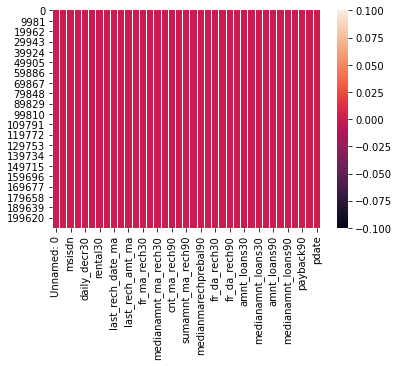

In [9]:
sns.heatmap(df.isnull())

In [10]:
#Checking the correlation between variables
df.corr()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
Unnamed: 0,1.000000,0.000403,-0.002048,0.002739,0.003077,-0.003906,-0.003459,-0.001853,-0.001133,-0.001064,...,0.001725,0.002387,0.000698,-0.002005,0.002241,0.000781,0.001742,-0.002615,-0.000040,0.002411
label,0.000403,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,...,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.002048,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,...,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.002739,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,...,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.003077,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,...,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,-0.003906,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,-0.003459,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,-0.001853,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,...,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,-0.001133,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,-0.001064,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260


<AxesSubplot:>

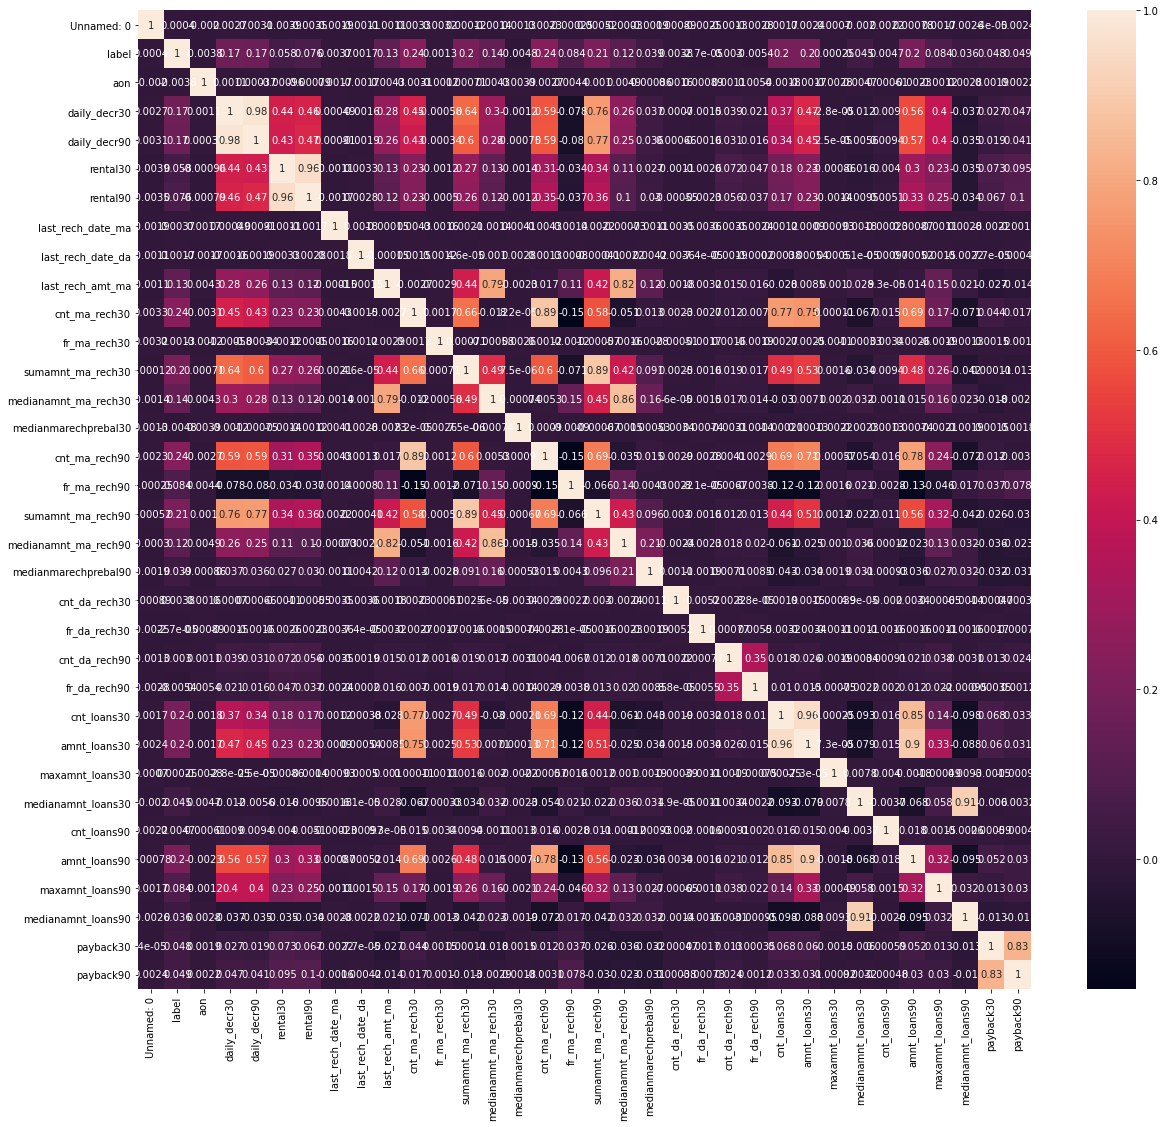

In [11]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(),annot=True)

The output variable/label is highly positive correlated to cnt_ma_rech30,cnt_ma_rech90,sumamnt_ma_rech30,sumamnt_ma_rech90,cnt_loans30,amnt_loans30 and amnt_loans90.

The output variable/label is negative correlated to aon,medianmarechprebal30,fr_da_rech30 and fr_da_rech90.

There is a high positive correlation between daily_decr30 and daily_decr90.

The rental30 and rental90 has a high positive correlation.

There is a high positive correlation between cnt_loans30 and amnt_loans30.

The payback30 and payback90 has a high positive correlation.

In [12]:
#Changing the pdate data type to datetime and separating day and month.
df['pdate']=pd.to_datetime(df['pdate'])
df['Day']=df['pdate'].apply(lambda x:x.day)
df['Month']=df['pdate'].apply(lambda x:x.month)

In [13]:
#Removing the unwanted columns
df=df.drop(['Unnamed: 0','pdate','pcircle','msisdn'],axis=1)

In [14]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6


In [15]:
df=abs(df)

In [16]:
con=df[['aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'Day', 'Month']]

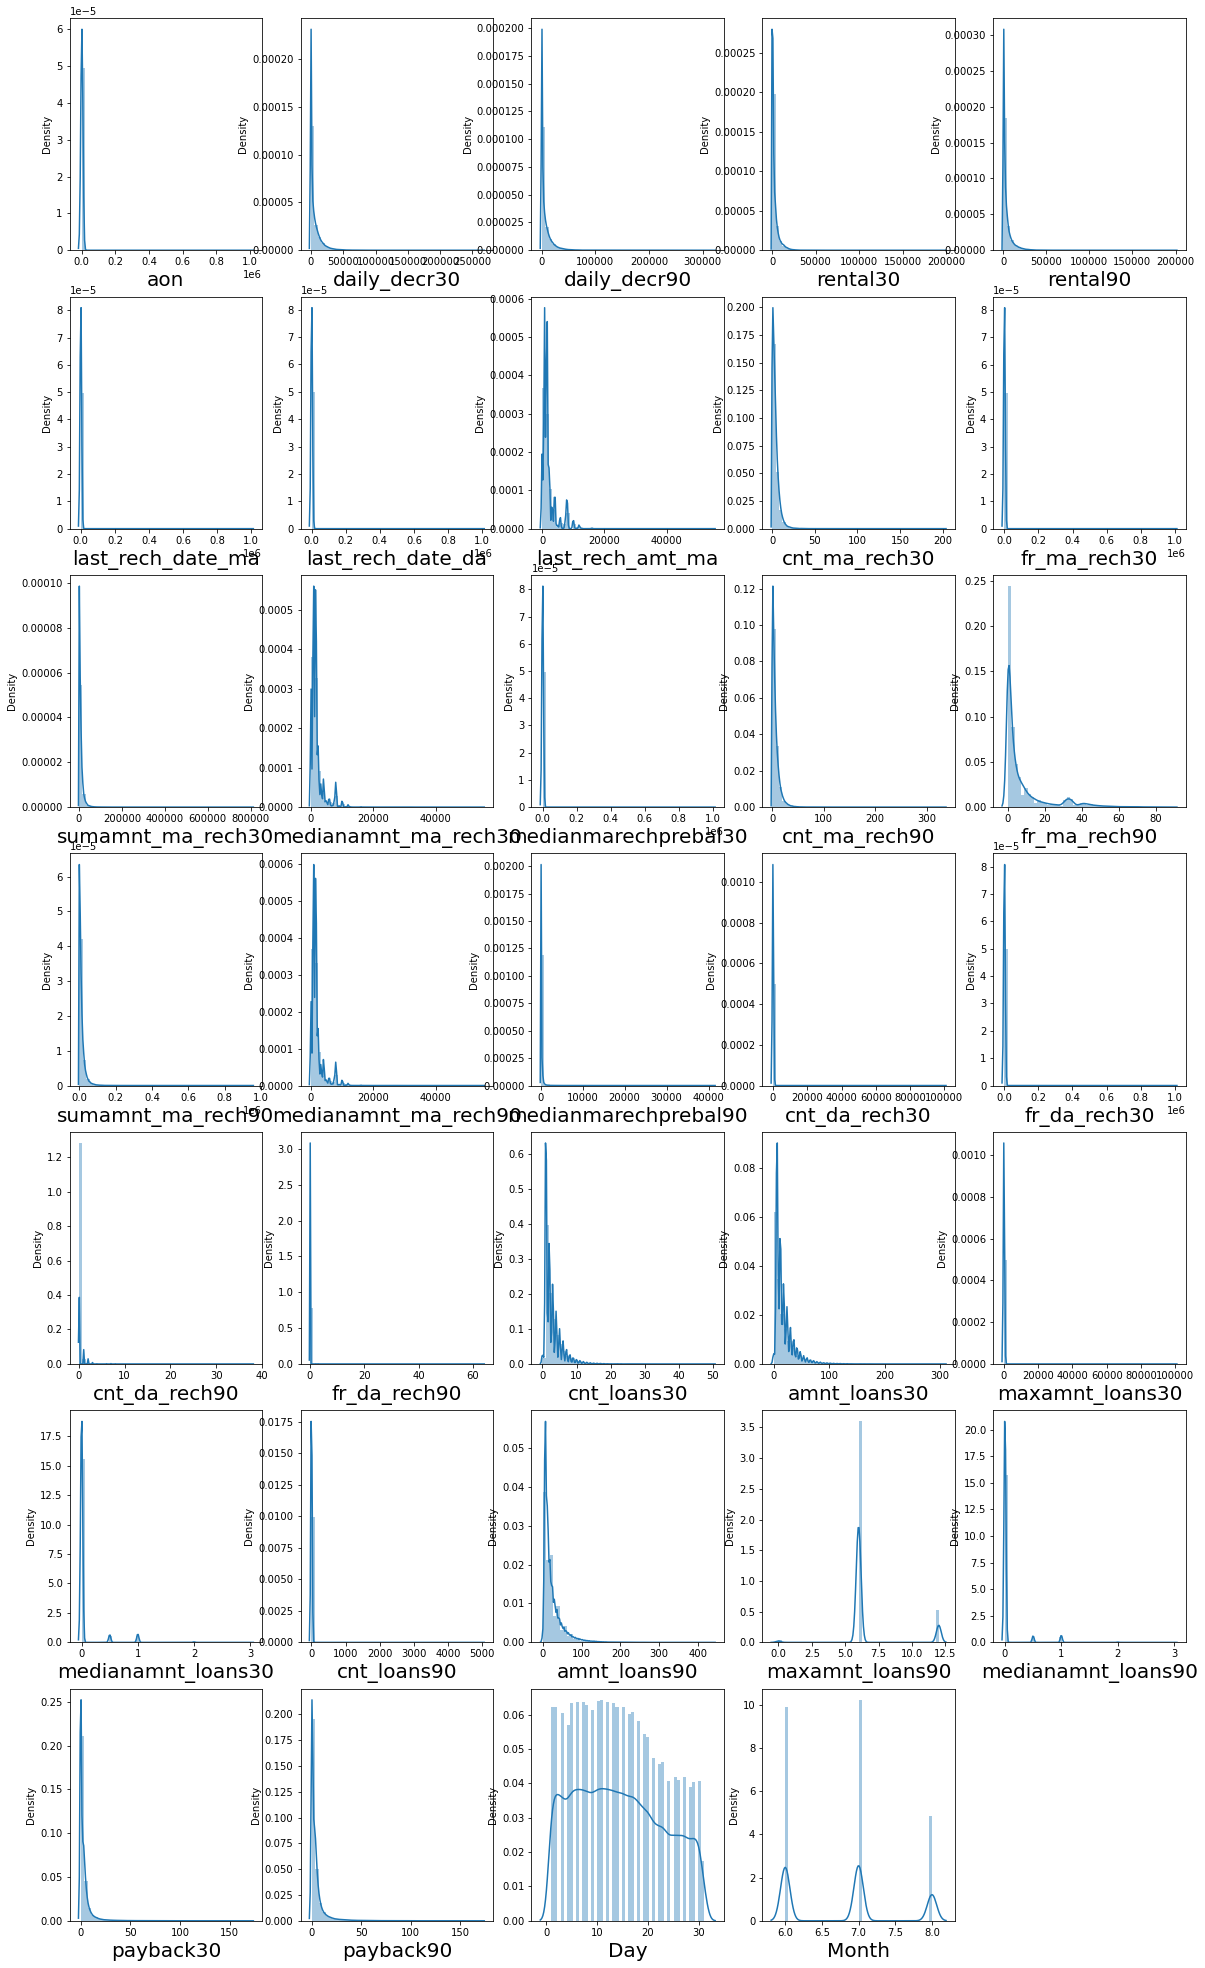

In [17]:
#Distribution plot 
plt.figure(figsize=(20,35))
plt_number=1
for i in con:
    if plt_number<=35:
        ax=plt.subplot(7,5,plt_number)
        sns.distplot(con[i])
        plt.xlabel(i,fontsize=20)
    plt_number+=1
plt.show()

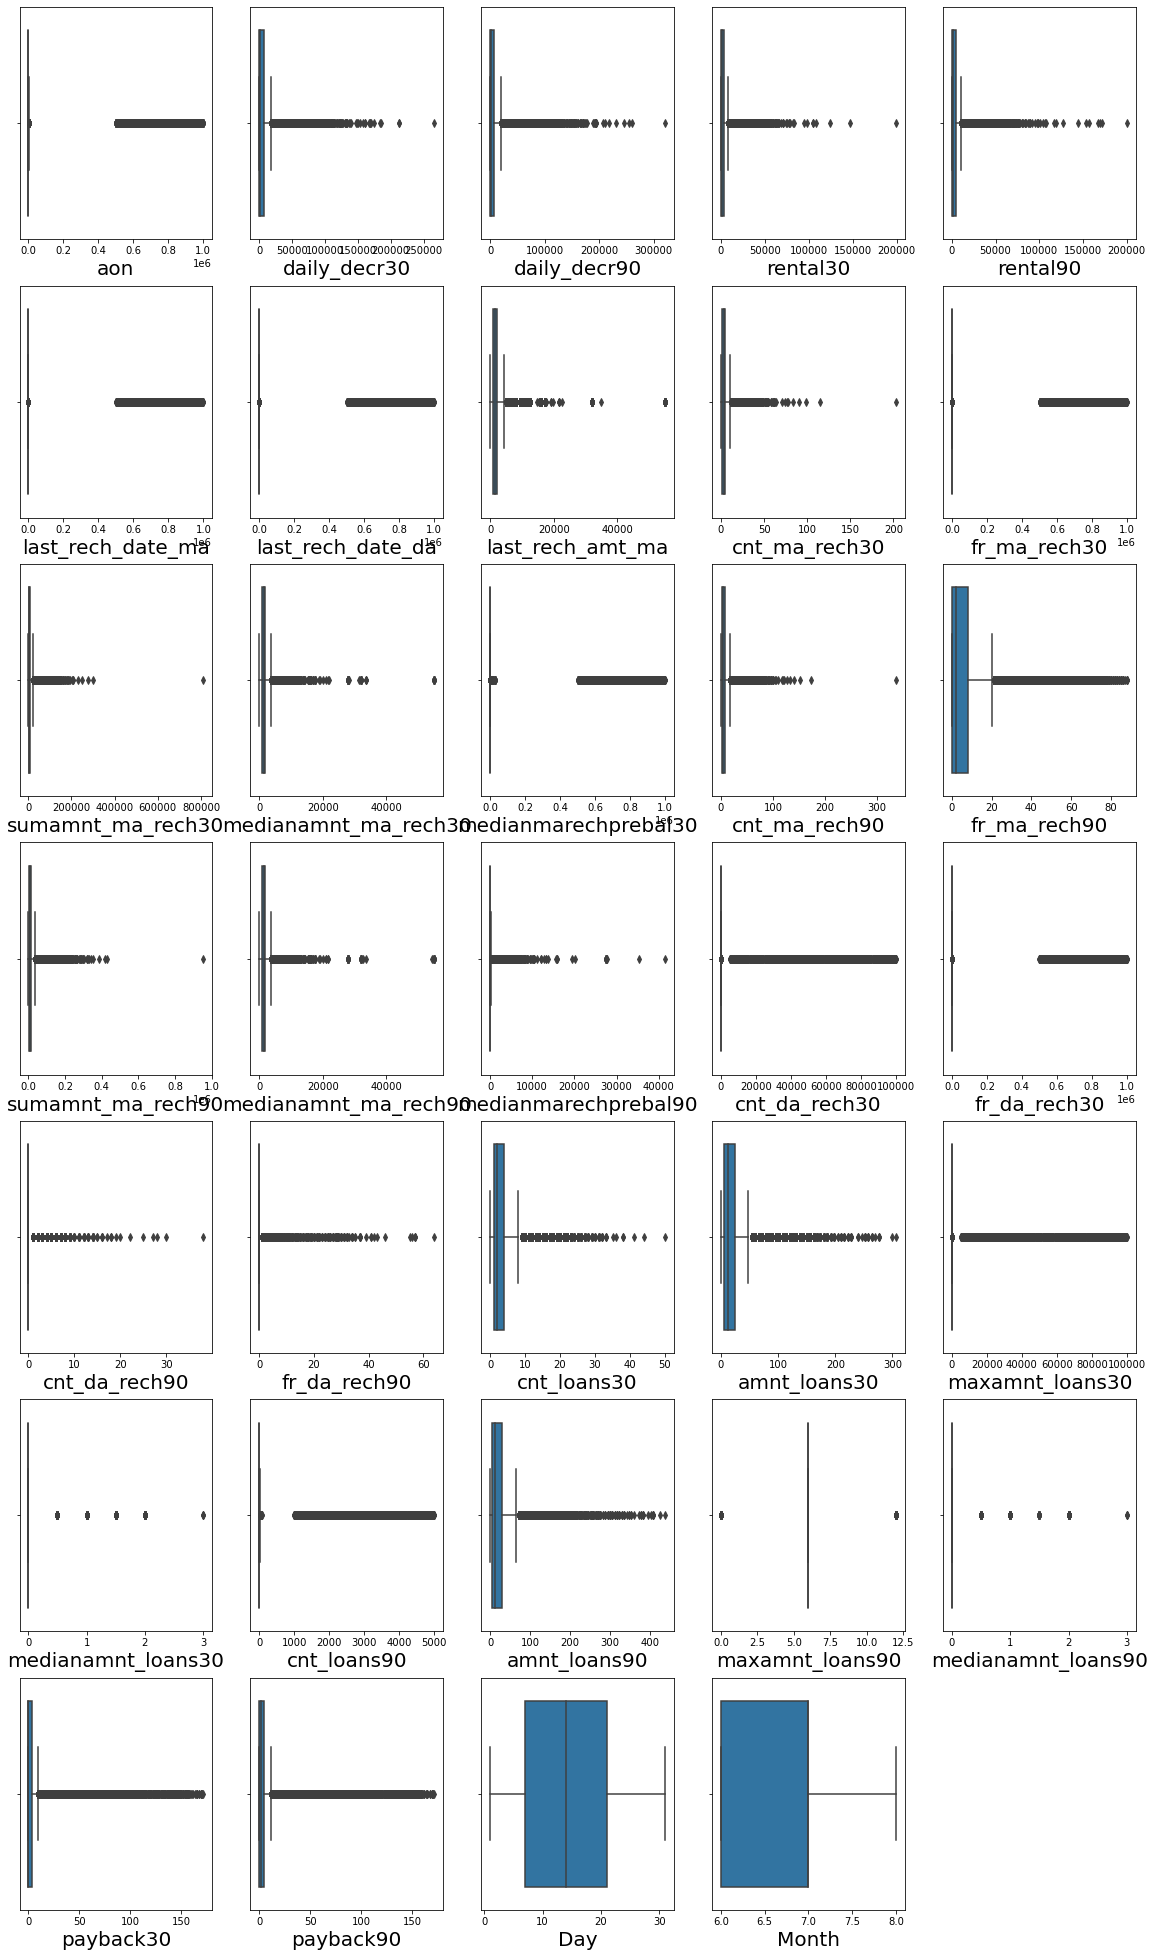

In [18]:
#Boxplot
plt.figure(figsize=(20,35))
plt_number=1
for i in con:
    if plt_number<=35:
        ax=plt.subplot(7,5,plt_number)
        sns.boxplot(con[i])
        plt.xlabel(i,fontsize=20)
    plt_number+=1
plt.show()

Large number of outliers are present in all the variables.

<AxesSubplot:xlabel='amnt_loans30'>

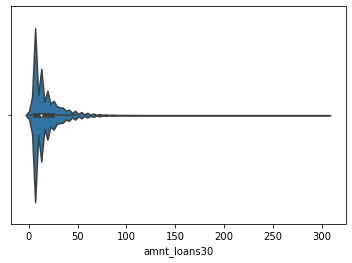

In [19]:
sns.violinplot('amnt_loans30',data=df)

Most of the users taken loan amount in last 30days is between 0 and 50.

<AxesSubplot:xlabel='amnt_loans90'>

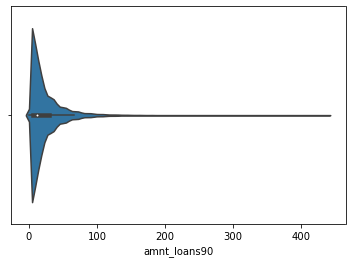

In [20]:
sns.violinplot('amnt_loans90',data=df)

Most of the users taken loan amount in last 90days is between 0 and 100.

<AxesSubplot:xlabel='daily_decr30', ylabel='rental30'>

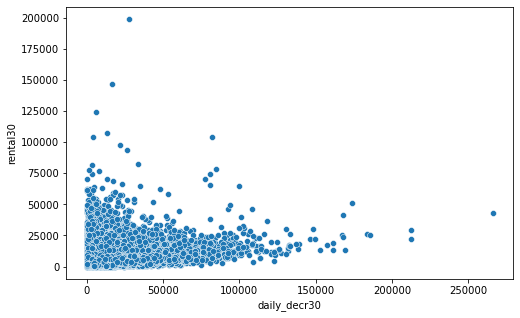

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='daily_decr30',y='rental30',data=df)

There is a positive correlation between daily_decr30 and rental30.

<AxesSubplot:xlabel='rental90', ylabel='daily_decr90'>

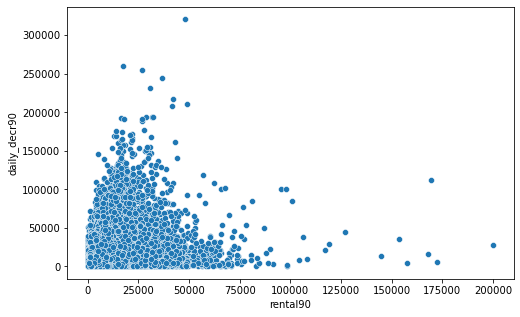

In [22]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='rental90',y='daily_decr90',data=df)

There is a positive correlation between daily_decr90 and rental90.

<AxesSubplot:xlabel='rental90', ylabel='rental30'>

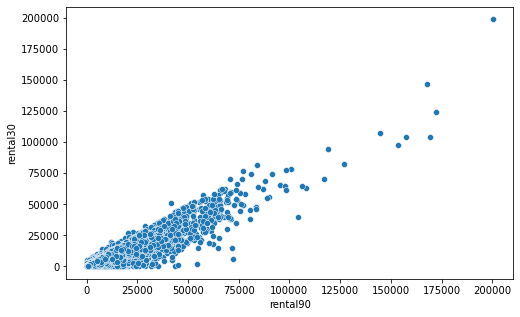

In [23]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='rental90',y='rental30',data=df)

There is a positive correlation between rental90 and rental30.

<AxesSubplot:xlabel='last_rech_amt_ma', ylabel='medianamnt_ma_rech30'>

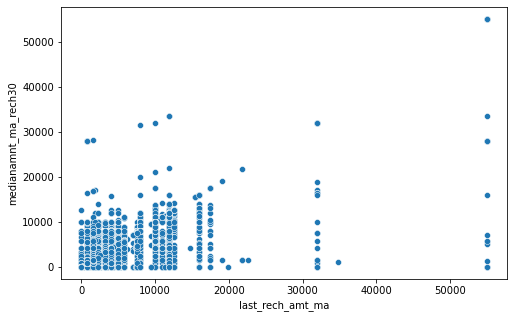

In [24]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='last_rech_amt_ma',y='medianamnt_ma_rech30',data=df)

There is a positive correlation between last_rech_amt_ma and medianamnt_ma_rech30.

<AxesSubplot:xlabel='cnt_ma_rech30', ylabel='cnt_ma_rech90'>

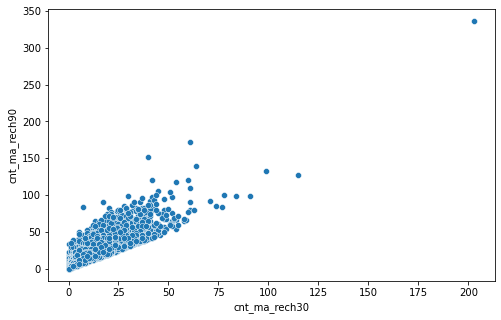

In [25]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='cnt_ma_rech30',y='cnt_ma_rech90',data=df)

There is a positive correlation between cnt_ma_rech30 and cnt_ma_rech90.

In [26]:
#Finding outliers
from scipy.stats import zscore

z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([15, 15, 32, ..., 28, 26, 30], dtype=int64))


In [27]:
#Removing the outliers
dfnew=df[(z<3).all(axis=1)]
print('dfnew.shape = ',dfnew.shape)
df=dfnew

dfnew.shape =  (161457, 35)


In [28]:
dataloss=((209593-161457)/209593)*100
dataloss

22.9664158631252

<AxesSubplot:xlabel='amnt_loans30', ylabel='count'>

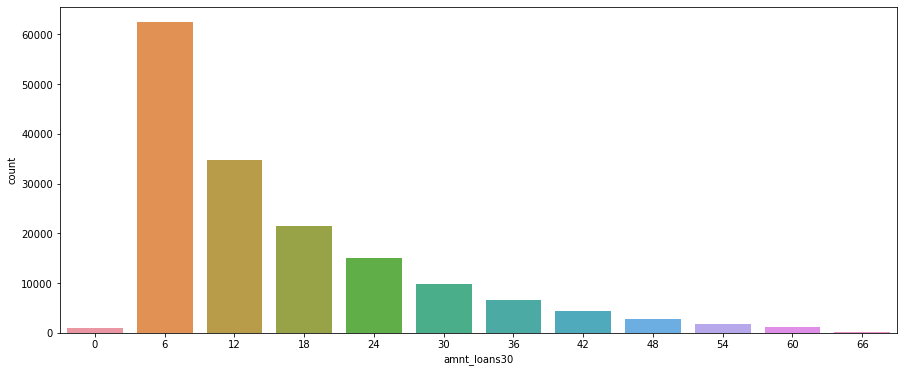

In [29]:
plt.figure(figsize=(15,6))
sns.countplot(df['amnt_loans30'])

In the 30 days case, Most users took loan amount 6,12,18 and 24.

<AxesSubplot:xlabel='amnt_loans90', ylabel='count'>

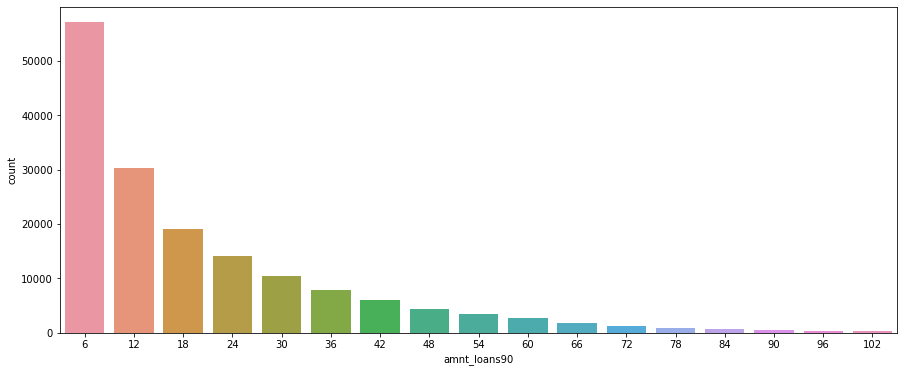

In [30]:
plt.figure(figsize=(15,6))
sns.countplot(df['amnt_loans90'])

In the 90 days case, Most users took loan amount 6,12,18,24 and 30.

<AxesSubplot:xlabel='cnt_loans30', ylabel='count'>

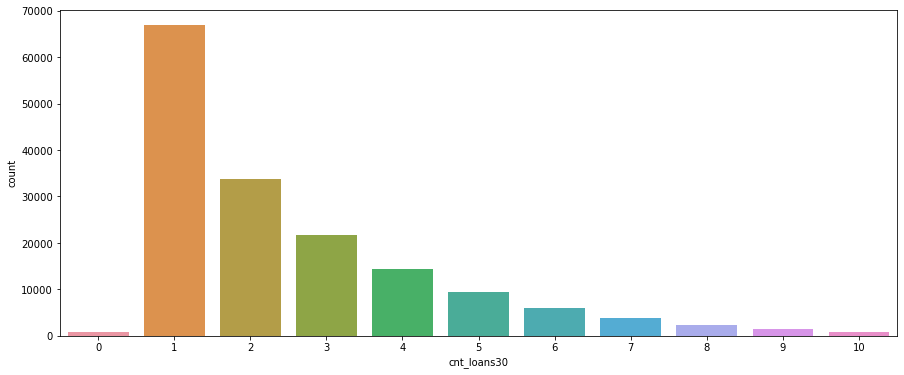

In [31]:
plt.figure(figsize=(15,6))
sns.countplot(df['cnt_loans30'])

In the last 30 days case, Mostly users took loan 1,2,3 and 4 times.

<AxesSubplot:xlabel='amnt_loans30', ylabel='sumamnt_ma_rech30'>

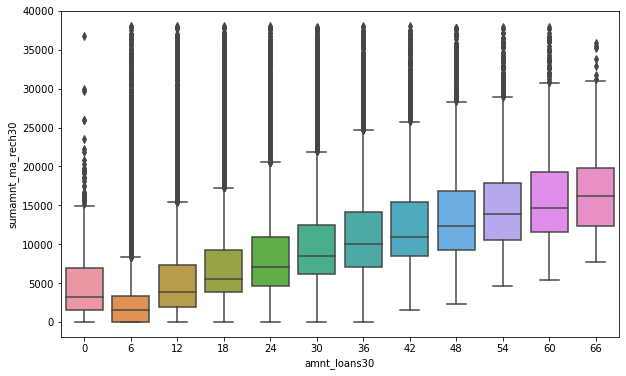

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(y='sumamnt_ma_rech30',x='amnt_loans30',data=df)

The users who took loan amount 6 has a total recharge amount in 30 days ranging from 0 to 8000.

The loan amount 30 is ranging from 0 to 22500 of the total recharge amount.

The loan amount 66 is ranging from 6000 to 31000 of the total recharge amount.

<AxesSubplot:xlabel='amnt_loans90', ylabel='sumamnt_ma_rech90'>

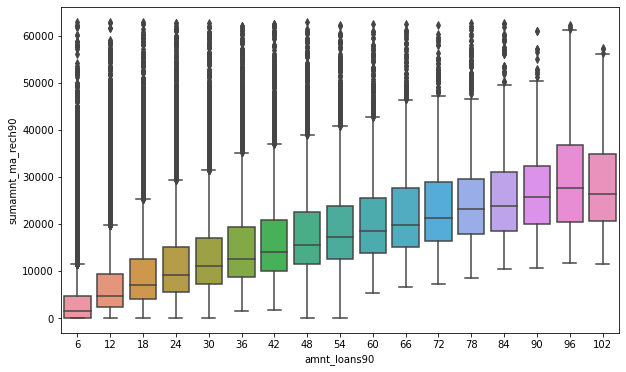

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(y='sumamnt_ma_rech90',x='amnt_loans90',data=df)

<AxesSubplot:xlabel='amnt_loans30', ylabel='payback30'>

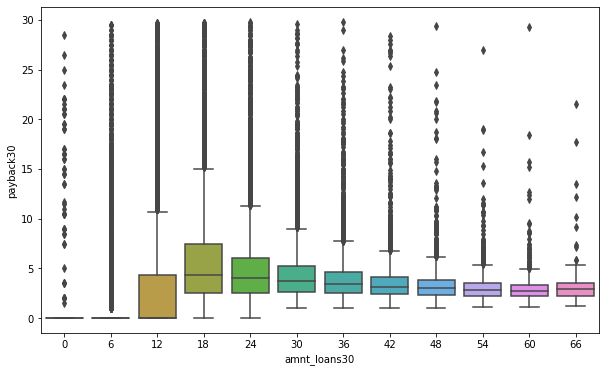

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(x='amnt_loans30',y='payback30',data=df)

For the loan amount 12 the payback30 ranging from 0 to 11 days.

For the loan amount 18 the payback30 ranging from 0 to 15 days.

For the loan amount 60 the payback30 ranging from 0 to 5 days.

<AxesSubplot:xlabel='amnt_loans90', ylabel='payback90'>

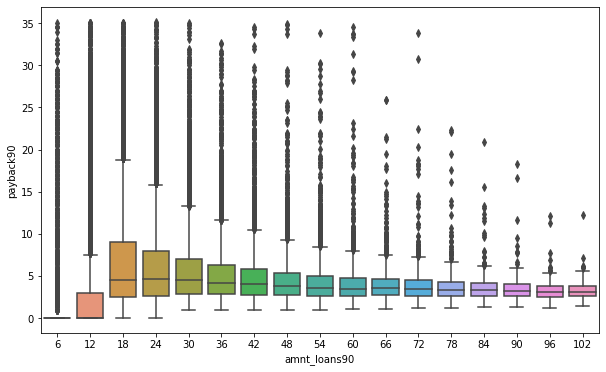

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(x='amnt_loans90',y='payback90',data=df)

<AxesSubplot:xlabel='amnt_loans30', ylabel='daily_decr30'>

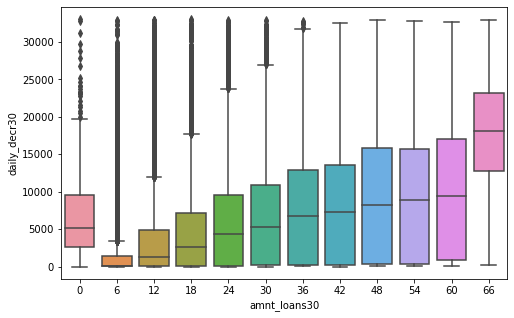

In [36]:
plt.figure(figsize=(8,5))
sns.boxplot(y='daily_decr30',x='amnt_loans30',data=df)

For the loan amount 6, daily amount spent is ranging from 0 to 4000.

For the loan amount 18, daily amount spent is ranging from 0 to 17500.

For the loan amount 42,48,54,60 and 66, daily amount spent is ranging from 0 to 40000.

<AxesSubplot:xlabel='cnt_ma_rech30', ylabel='daily_decr30'>

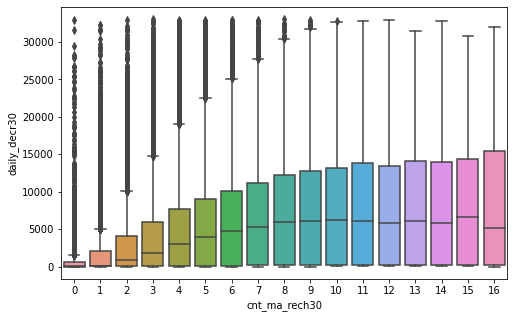

In [37]:
plt.figure(figsize=(8,5))
sns.boxplot(y='daily_decr30',x='cnt_ma_rech30',data=df)

<AxesSubplot:xlabel='cnt_ma_rech30', ylabel='payback30'>

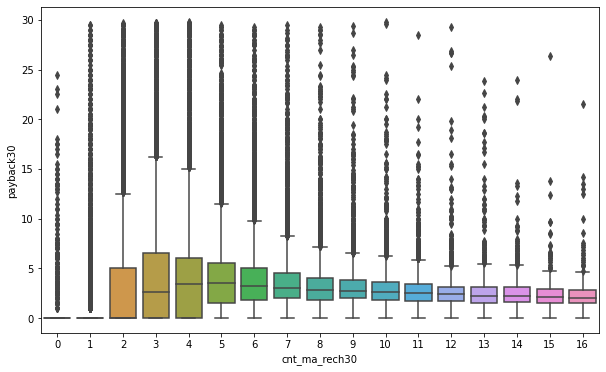

In [38]:
plt.figure(figsize=(10,6))
sns.boxplot(x='cnt_ma_rech30',y='payback30',data=df)

<AxesSubplot:xlabel='cnt_ma_rech90', ylabel='payback90'>

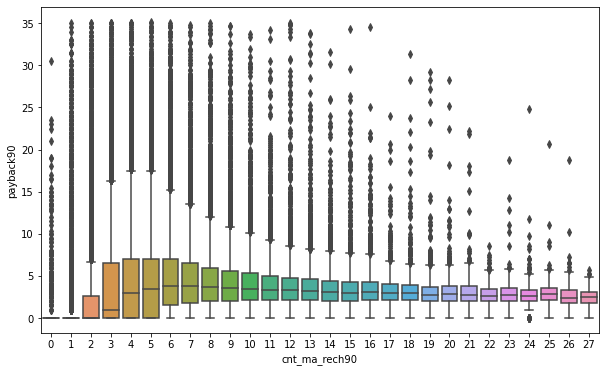

In [39]:
plt.figure(figsize=(10,6))
sns.boxplot(x='cnt_ma_rech90',y='payback90',data=df)

In [40]:
# Separating dependent and independent variables

X=df.drop('label',axis=1)
Y=df['label']
print(X.shape)
print(Y.shape)

(161457, 34)
(161457,)


In [41]:
#Checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])] 
vif['Features']=X.columns
vif

,VIF,Features
0,2.754849,aon
1,45.916579,daily_decr30
2,50.288823,daily_decr90
3,18.937889,rental30
4,20.413789,rental90
5,2.037416,last_rech_date_ma
6,1.992091,last_rech_date_da
7,7.293303,last_rech_amt_ma
8,31.831354,cnt_ma_rech30
9,1.976940,fr_ma_rech30


Multicollinearity present in daily_decr30,daily_decr90,cnt_loans30,amnt_loans30,cnt_loans90 and amnt_loans90.

In [42]:
#Removing daily_decr90,cnt_loans90 and cnt_loans30
X=X.drop(['cnt_loans90','cnt_loans30','daily_decr90'],axis=1)

In [43]:
#Scaling dataponits using standardscaler
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()
X=scale.fit_transform(X)
X

array([[-0.75601232, -0.12641283, -0.65406576, ...,  5.20744401,
         0.67409479,  0.38858452],
       [ 0.13140196,  1.4753977 ,  0.61930299, ..., -0.64706759,
        -0.51442423,  1.77660008],
       [-0.2255806 , -0.41915516, -0.40461075, ..., -0.64706759,
         0.55524289,  1.77660008],
       ...,
       [ 0.738474  ,  1.42612796,  1.41556703, ...,  0.12680463,
         1.74376191,  0.38858452],
       [ 2.18858961,  1.54009734, -0.58374146, ...,  1.47266937,
         1.2683543 ,  0.38858452],
       [ 1.88404517,  0.12697956, -0.55729556, ..., -0.64706759,
        -0.87097994,  0.38858452]])

In [44]:
#Checking the target value counts
Y.value_counts()

1    139057
0     22400
Name: label, dtype: int64

Target variable is imbalanced, need to balance.

In [45]:
#Resampling using Random under sampler
from imblearn.under_sampling import RandomUnderSampler

rus=RandomUnderSampler()
x,y=rus.fit_resample(X,Y)
X=x
Y=y
Y.value_counts()

0    22400
1    22400
Name: label, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score


lg=LogisticRegression()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
gb=GradientBoostingClassifier()

In [47]:
#Splitting the training and testing data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
#Logistic regression
lg.fit(x_train,y_train)
lg.score(x_train,y_train)

0.7676020408163265

In [48]:
predlg=lg.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predlg))
print('Confusion matrix :',confusion_matrix(y_test,predlg))
print('Classification report :',classification_report(y_test,predlg))

Accuracy score : 0.7674107142857143
Confusion matrix : [[5362 1402]
 [1724 4952]]
Classification report :               precision    recall  f1-score   support

           0       0.76      0.79      0.77      6764
           1       0.78      0.74      0.76      6676

    accuracy                           0.77     13440
   macro avg       0.77      0.77      0.77     13440
weighted avg       0.77      0.77      0.77     13440



In [51]:
#Decision tree
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)

0.999968112244898

In [52]:
preddtc=dtc.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,preddtc))
print('Confusion matrix :',confusion_matrix(y_test,preddtc))
print('Classification report :',classification_report(y_test,preddtc))

Accuracy score : 0.7954613095238096
Confusion matrix : [[5396 1368]
 [1381 5295]]
Classification report :               precision    recall  f1-score   support

           0       0.80      0.80      0.80      6764
           1       0.79      0.79      0.79      6676

    accuracy                           0.80     13440
   macro avg       0.80      0.80      0.80     13440
weighted avg       0.80      0.80      0.80     13440



In [53]:
#Random forest
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)

0.9999362244897959

In [54]:
predrfc=rfc.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predrfc))
print('Confusion matrix :',confusion_matrix(y_test,predrfc))
print('Classification report :',classification_report(y_test,predrfc))

Accuracy score : 0.8467261904761905
Confusion matrix : [[5562 1202]
 [ 858 5818]]
Classification report :               precision    recall  f1-score   support

           0       0.87      0.82      0.84      6764
           1       0.83      0.87      0.85      6676

    accuracy                           0.85     13440
   macro avg       0.85      0.85      0.85     13440
weighted avg       0.85      0.85      0.85     13440



In [55]:
#GradientBoost
gb.fit(x_train,y_train)
gb.score(x_train,y_train)

0.8532844387755102

In [56]:
predgb=gb.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predgb))
print('Confusion matrix :',confusion_matrix(y_test,predgb))
print('Classification report :',classification_report(y_test,predgb))

Accuracy score : 0.8496279761904761
Confusion matrix : [[5694 1070]
 [ 951 5725]]
Classification report :               precision    recall  f1-score   support

           0       0.86      0.84      0.85      6764
           1       0.84      0.86      0.85      6676

    accuracy                           0.85     13440
   macro avg       0.85      0.85      0.85     13440
weighted avg       0.85      0.85      0.85     13440



Hyper Parameter Tuning

In [57]:
#Logistic Regression
grid_para={'penalty':['l1','l2','elasticnet'],'C':[0.1,0.001,1.0,1.5,2.8],'solver':['newton-cg','lbfgs','sag','saga'],'multi_class':['auto','ovr','multinomial']}
grid_search=GridSearchCV(estimator=lg,param_grid=grid_para,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.001, 1.0, 1.5, 2.8],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']})

In [58]:
best_para=grid_search.best_params_
print(best_para)

{'C': 1.5, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'saga'}


In [59]:
lg=LogisticRegression(C=1.5,multi_class='auto',penalty='l1',solver='saga') 
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predlg))
print('Confusion matrix',confusion_matrix(y_test,predlg))
print('Classification report :',classification_report(y_test,predlg))

Accuracy score : 0.7673363095238095
Confusion matrix [[5362 1402]
 [1725 4951]]
Classification report :               precision    recall  f1-score   support

           0       0.76      0.79      0.77      6764
           1       0.78      0.74      0.76      6676

    accuracy                           0.77     13440
   macro avg       0.77      0.77      0.77     13440
weighted avg       0.77      0.77      0.77     13440



In [60]:
#DTC
grid_para={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':range(1,20,2),'min_samples_split':range(2,20,2),'max_features':['auto','sqrt','log2']}
grid_search=GridSearchCV(estimator=dtc,param_grid=grid_para,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20, 2),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': range(2, 20, 2),
                         'splitter': ['best', 'random']})

In [61]:
best_para=grid_search.best_params_
print(best_para)

{'criterion': 'entropy', 'max_depth': 11, 'max_features': 'sqrt', 'min_samples_split': 10, 'splitter': 'best'}


In [62]:
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=11,max_features='sqrt',
                           min_samples_split=10,splitter='best')
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,preddtc))
print('Confusion matrix :',confusion_matrix(y_test,preddtc))
print('Classification report :',classification_report(y_test,preddtc))

Accuracy score : 0.7898065476190477
Confusion matrix : [[5540 1224]
 [1601 5075]]
Classification report :               precision    recall  f1-score   support

           0       0.78      0.82      0.80      6764
           1       0.81      0.76      0.78      6676

    accuracy                           0.79     13440
   macro avg       0.79      0.79      0.79     13440
weighted avg       0.79      0.79      0.79     13440



In [63]:
#Random forest
grid_para={'criterion':['gini','entropy'],'min_samples_split':range(1,10,1),'bootstrap':[True,False],'max_features': ['auto','log2','sqrt']}
grid_search=GridSearchCV(estimator=rfc,param_grid=grid_para,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_split': range(1, 10)})

In [64]:
best_para=grid_search.best_params_
print(best_para)

{'bootstrap': False, 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 8}


In [65]:
rfc=RandomForestClassifier(bootstrap=False,criterion='gini',
                           max_features='sqrt',min_samples_split=8)
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predrfc))
print('Confusion matrix :',confusion_matrix(y_test,predrfc))
print('Classification report :',classification_report(y_test,predrfc))

Accuracy score : 0.8499255952380952
Confusion matrix : [[5576 1188]
 [ 829 5847]]
Classification report :               precision    recall  f1-score   support

           0       0.87      0.82      0.85      6764
           1       0.83      0.88      0.85      6676

    accuracy                           0.85     13440
   macro avg       0.85      0.85      0.85     13440
weighted avg       0.85      0.85      0.85     13440



In [66]:
#GradientBoost
grid_para={'learning_rate':[0.001,0.01,0.1,1.0,1.5],'loss':['deviance','exponential'],'subsample':[0.1,1.0,1.5,2.0],'max_depth':[2,5,7,10],'max_features': ['auto','log2','sqrt']}
grid_search=GridSearchCV(estimator=gb,param_grid=grid_para,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0, 1.5],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [2, 5, 7, 10],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'subsample': [0.1, 1.0, 1.5, 2.0]})

In [67]:
best_para=grid_search.best_params_
print(best_para)

{'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 7, 'max_features': 'auto', 'subsample': 1.0}


In [68]:
gb=GradientBoostingClassifier(learning_rate=0.1,loss='exponential',
                              max_depth=7,max_features='auto',subsample=1.0)
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predgb))
print('Confusion matrix :',confusion_matrix(y_test,predgb))
print('Classification report :',classification_report(y_test,predgb))

Accuracy score : 0.8591517857142857
Confusion matrix : [[5788  976]
 [ 917 5759]]
Classification report :               precision    recall  f1-score   support

           0       0.86      0.86      0.86      6764
           1       0.86      0.86      0.86      6676

    accuracy                           0.86     13440
   macro avg       0.86      0.86      0.86     13440
weighted avg       0.86      0.86      0.86     13440



Cross Validation

In [69]:
#Logistic regression
score=cross_val_score(lg,X,Y,cv=3)
print(score)
print(score.mean())

[0.76824695 0.76381169 0.76903502]
0.7670312228631607


In [70]:
#DTC
score=cross_val_score(dtc,X,Y,cv=3)
print(score)
print(score.mean())

[0.78980849 0.7958883  0.79615616]
0.7939509853235408


In [71]:
#Random forest
score=cross_val_score(rfc,X,Y,cv=3)
print(score)
print(score.mean())

[0.84699344 0.84885823 0.84905913]
0.8483036006732786


In [72]:
#GradientBoost
score=cross_val_score(gb,X,Y,cv=3)
print(score)
print(score.mean())

[0.86031874 0.8565593  0.85809951]
0.8583258483730493


ROC Curve

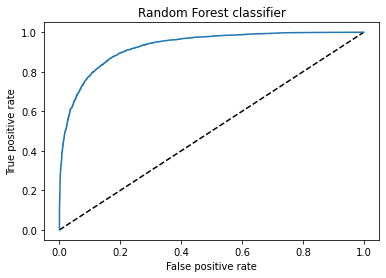

0.8500940640524908

In [73]:
#Random Forest
predrfc_prob=rfc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,predrfc_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Random Forest Classifier")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest classifier')
plt.show()
auc_score=roc_auc_score(y_test,rfc.predict(x_test))
auc_score

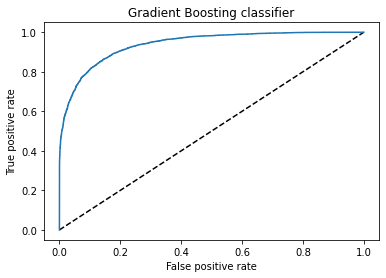

0.8591744916076688

In [74]:
#GradientBoosting
predgb_prob=gb.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,predgb_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Gradient Boosting Classifier")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Gradient Boosting classifier')
plt.show()
auc_score=roc_auc_score(y_test,gb.predict(x_test))
auc_score

The Random forest model accuracy score and cross validation score is 84.99% and 84.83%.

The Gradient boosting model accuracy score and cross validation score is 85.91 and 85.83%.

The Gradient Bossting model gives the best result.

In [76]:
import pickle
filename="Micro credit defaulter.pkl"
pickle.dump(gb,open(filename, 'wb'))

Conclusion

In [77]:
model=pickle.load(open("Micro credit defaulter.pkl",'rb'))
result=model.score(x_test,y_test)
print('The Accuracy score of the model : ',result*100)

The Accuracy score of the model :  85.91517857142857


In [80]:
Accuracy=pd.DataFrame([model.predict(x_test),predgb],index=['Predicted','Original'])
Accuracy

,0,1,2,3,4,5,6,7,8,9,...,13430,13431,13432,13433,13434,13435,13436,13437,13438,13439
Predicted,1,0,0,0,1,0,1,1,1,0,...,1,0,1,0,1,0,0,0,1,1
Original,1,0,0,0,1,0,1,1,1,0,...,1,0,1,0,1,0,0,0,1,1
